## Lab 1 for Dynamics of Complex Networks & Systems
Author: Yile Wang  
Date: 01/29/2023

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Section 6.1 2 Networks 
This section we need to 
1. create a graph
2. print out the `number of nodes` and `number of edges`
3. check the edges in the graph
4. print out the corresponding adjacency matrix
5. print out the `A == A.T`. If `A == A.T`, it means that the matrix is symmetric.


In [2]:
# 1. create a graph
G=nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)

# 2. print out & 3. check the edges
print('#Node: %i, #Edge: %i' % (G.number_of_nodes(), G.number_of_edges()))
print('Has 3-4 edge: %s' % G.has_edge(3,4))

G.add_nodes_from(range(1,7))

# 4. print out the corresponding adjacency matrix
print(f"adjacency matrix is \n {nx.to_numpy_array(G).T}")

# 5. print out the A==A.T
A = nx.to_numpy_array(G).T
print((A==A.T).any())


#Node: 3, #Edge: 2
Has 3-4 edge: False
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
True


### Section 6.3 Weighted Networks
1. add weight to edges and print the adjacency matrix

{1: {'weight': 3}, 3: {'weight': 2}}
[[0. 3. 0.]
 [3. 0. 2.]
 [0. 2. 0.]]


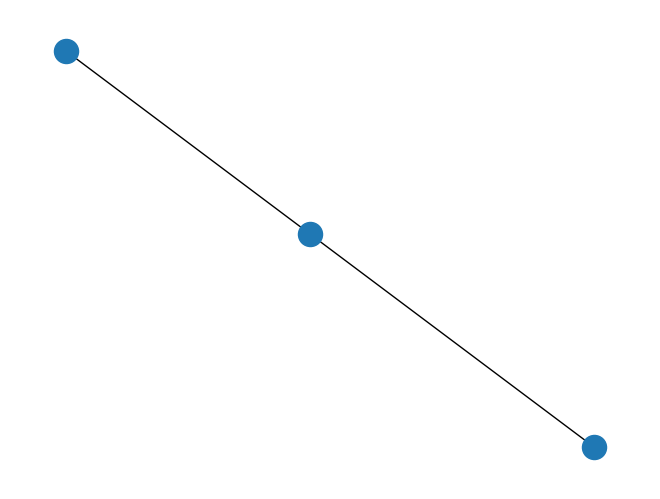

In [17]:
# 1. add weights to edges
G2=nx.Graph()
G2.add_edge(1,2, weight=3)
G2.add_edge(2,3,weight=2)
print(G2[2])
print(nx.to_numpy_array(G2).T)

### Section 6.4 Directed networks
1. create directed graph

In [4]:
# 1. directed graph, compared it to the book graph 6.2 in chapter 6.4
Di = nx.DiGraph()
Di.add_edges_from([(3,1), (2,3), (6,2),(5,6),(4,6),(5,4),(1,4),(3,5)])
print(nx.to_numpy_array(Di).T)

[[0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]]


### The equation of the cocitation network is

$$ C_{ij} = \sum^n_{k=1} A_{ik} A_{jk} $$

### Section 6.4.1 Cocitation network
In this case we need to write a function to generate the cocitation network.

To answer questions:
1. _Q: the sum should be zero but not, what did we miss?_  
    A: In the beginning, I failed to generate zeros but I realized that we need to consider the `weight` of each edges into our network.  
---
2. _Q: Meaning of the neighbors in cocitation network? for `Linear Combination`? Print both_  
    A: The meaning of the neighbors in cocitation network is that they have used same words in their definitions. And The more same words they used, the more similar between the two vertex (or nodes or definitions). The in-neighbors of `Linear Combination` in the original graph can only reflect if the `Linear Combination` is mentioned in their definitions.  
---
3. _Q: Now similary apply bibliographic coupling function?_  
    A: Done. I defined a function called `network_similarity` when I tried to answer question 1. This function has different mode to calculate the `cocitation network` or `bibliographic coupling`.

In [5]:
# 1. write down the function
# Read the gml file
G = nx.read_gml("./proofwikidefs_la.gml", 'name')


def network_similarity(G, mode="co"):
    """ 
    The algorithm to compute the network similarity (cocitation network, bibliographic network) based on graphical approach. 
    By graphical approach, which means that we need to use networkx package to compute the edges between each pair of nodes, to find out the similarity between certain pair of nodes.
    -----------------
    Input:
        A graph
    -----------------
    Output:
        a cocitation/bibliographic graph
    """


    # A helper function to calculate the common weights between nodes i and j
    def cal_co_weights(G, i,j, mode=mode):
        """ 
        Helping to calculate the common weights in different modes: cocitation network or bibliographic network
        --------------------
        Input:
            G: graph
                Directed graph
            i: str, int
                node name/index
            j: str, int
                node name/index
            mode: str
                this function supports two modes: one is to calculate the cocitation network, and the other is to calculate the bibliographic network.
        ---------------------
        Return:
            co_weight: float
                The common weight between the two nodes
        """
        if mode in ["co", "cocitation"]:
            # G.predecessors will return the a directed edge from m to n
            common_edges = [ele for ele in list(G.predecessors(i)) if ele in list(G.predecessors(i)) and ele in list(G.predecessors(j))]
            iw = [G.get_edge_data(ele, i)["weight"] for ele in common_edges]
            jw = [G.get_edge_data(ele, j)["weight"] for ele in common_edges]
            co_weight = np.dot(iw, jw)
            return co_weight

        elif mode in ["bi", "biliographic"]:
            # G.successors directed edge from n to next layer
            common_edges = [ele for ele in list(G.successors(i)) if ele in list(G.successors(i)) and ele in list(G.successors(j))]
            iw = [G.get_edge_data(i, ele)["weight"] for ele in common_edges]
            jw = [G.get_edge_data(j, ele)["weight"] for ele in common_edges]
            co_weight = np.dot(iw, jw)
            return co_weight


    # Define CG
    CG = nx.Graph()
    CG.add_nodes_from(G.nodes(data=True)) # keep the node information
    for ind, i in enumerate(G.nodes):
        for j in list(G.nodes)[ind:]:
            co_weight = cal_co_weights(G , i, j)
            if co_weight > 0:
                CG.add_edge(i, j, weight= co_weight)
    return CG

cocit_net = network_similarity(G)
# test
a = nx.to_numpy_array(G).T
C1 = np.dot(a, a.T)
C2 = nx.to_numpy_array(cocit_net).T
Cdiff = C1-C2
print(f"Diff between C1 and C2 is {Cdiff.sum().sum()}")

Diff between C1 and C2 is 0.0


In [6]:
# 2. comparison
# cocitation network
all_neighbors = list(nx.all_neighbors(cocit_net, "Linear Combination"))
all_weights = [cocit_net.get_edge_data(ele, "Linear Combination", default=0)["weight"] for ele in all_neighbors] 
for ind, i in enumerate(all_neighbors):
    print(f"Neighbor {ind} is {all_neighbors[ind]} with weight {all_weights[ind]}")

Neighbor 0 is Vector (Euclidean Space) with weight 10.0
Neighbor 1 is Set of All Linear Transformations with weight 1.0
Neighbor 2 is Ordered Basis with weight 3.0
Neighbor 3 is Linearly Independent/Sequence/Real Vector Space with weight 4.0
Neighbor 4 is Linearly Dependent/Sequence/Real Vector Space with weight 6.0
Neighbor 5 is Linear Span with weight 6.0
Neighbor 6 is Linear Combination of Subset with weight 10.0
Neighbor 7 is Linear Combination of Sequence with weight 8.0
Neighbor 8 is Linear Combination of Empty Set with weight 6.0
Neighbor 9 is Linear Combination with weight 26.0
Neighbor 10 is Matrix with weight 1.0
Neighbor 11 is Basis (Linear Algebra) with weight 2.0
Neighbor 12 is Matrix Product (Conventional) with weight 1.0
Neighbor 13 is Module with weight 8.0
Neighbor 14 is Linearly Independent/Set/Real Vector Space with weight 1.0
Neighbor 15 is Linearly Dependent/Set/Real Vector Space with weight 2.0
Neighbor 16 is Linearly Independent/Set with weight 1.0
Neighbor 17 is

In [7]:
# 2. original network
all_in_neighbors = list(G.predecessors("Linear Combination"))
all_in_weights = [G.get_edge_data(ele, "Linear Combination", default=0)["weight"] for ele in all_in_neighbors]
for ind, i in enumerate(all_in_neighbors):
    print(f"In-Neighbor {ind} is {all_in_neighbors[ind]} with weight {all_in_weights[ind]}") 

In-Neighbor 0 is Spanning Set with weight 1.0
In-Neighbor 1 is Linearly Dependent/Sequence/Real Vector Space with weight 1.0
In-Neighbor 2 is Linear Span with weight 1.0
In-Neighbor 3 is Linear Combination/Subset with weight 1.0
In-Neighbor 4 is Linear Combination/Sequence with weight 1.0
In-Neighbor 5 is Linear Combination/Empty Set with weight 1.0
In-Neighbor 6 is Linear Combination of Subset with weight 1.0
In-Neighbor 7 is Linear Combination of Sequence with weight 1.0
In-Neighbor 8 is Linear Combination of Empty Set with weight 1.0
In-Neighbor 9 is Generator/Module/Spanning Set with weight 1.0
In-Neighbor 10 is Relative Matrix with weight 1.0
In-Neighbor 11 is Linearly Independent/Sequence with weight 1.0
In-Neighbor 12 is Linearly Independent Sequence with weight 1.0
In-Neighbor 13 is Linearly Independent with weight 1.0
In-Neighbor 14 is Linearly Dependent/Sequence with weight 2.0
In-Neighbor 15 is Linearly Dependent Sequence with weight 2.0
In-Neighbor 16 is Linearly Dependent 

In [13]:
# 3. new function to produce bibliographic coupling:

# we will just use `network_similarity` function
BC = network_similarity(G, mode="bi")
print(f"Bibliographic matrix: \n {nx.to_numpy_array(BC).T}")

Bibliographic matrix: 
 [[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 5. ... 1. 2. 0.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 2. ... 1. 4. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Concept Question
1. _Q: Try to reverse the cocitation network and check bibliographic network_  
    A: They are same. The bibligraphic network would be the same with cocitation network.
---
2. _Q: Is it possible to have same cocitation and same bibliographic coupling graphs?_  
    A: No I don't think so. The reason is that I don't think there is a $B$ matrix can satisfy  $AA^T = B^TB$ or  $BB^T = A^TA$ when  $A \neq B$.  

    $AA^T = A^TA$ can be true when A is a square matrix. However, it is impossible to find a $B$ completely equals $A$ but not $A$. Thus, it's impossible to achieve it.


the original matrix: 
 [[0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0.]]
the cocitation network: 
 [[0. 4. 4. 4. 4. 4.]
 [4. 0. 4. 4. 4. 4.]
 [4. 4. 0. 4. 4. 4.]
 [4. 4. 4. 0. 4. 4.]
 [4. 4. 4. 4. 0. 4.]
 [4. 4. 4. 4. 4. 0.]]
the bibliographic network: 
 [[0. 4. 4. 4. 4. 4.]
 [4. 0. 4. 4. 4. 4.]
 [4. 4. 0. 4. 4. 4.]
 [4. 4. 4. 0. 4. 4.]
 [4. 4. 4. 4. 0. 4.]
 [4. 4. 4. 4. 4. 0.]]
the differences between cocitation and bibliographic coupling is 0.0


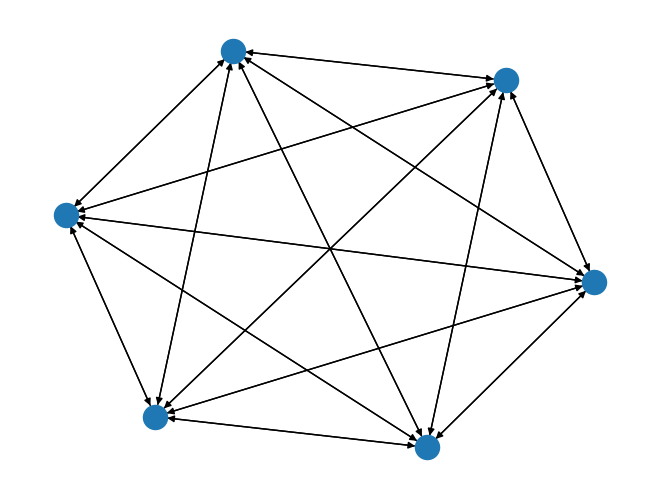

In [16]:
# 1. try to reverse it:
Dnet = nx.DiGraph()
for i in range(6):
    for j in range(6):
        if i != j:
            Dnet.add_edge(i, j, weight=1)
            Dnet.add_edge(j, i, weight=1)
nx.draw(Dnet)
original = nx.to_numpy_array(Dnet).T
print(f"the original matrix: \n {original}")

# the cocitation network
co = network_similarity(Dnet)
co_adj = nx.to_numpy_array(co).T
# fix the diagonal
np.fill_diagonal(co_adj, 0)
print(f"the cocitation network: \n {co_adj}")

# the bibliographic network
bi = network_similarity(Dnet, mode="bi")
bi_adj = nx.to_numpy_array(bi).T
# fix the diagonal
np.fill_diagonal(bi_adj, 0)
print(f"the bibliographic network: \n {bi_adj}")

cdiff = co_adj - bi_adj
print(f"the differences between cocitation and bibliographic coupling is {cdiff.sum().sum()}")

In [10]:
# 2. example of same cocitaiton and bibliographic networks:
newG1 = nx.DiGraph()
newG1.add_weighted_edges_from([(1,2, 1), (2,3, 1), (3,1, 1),(2,1, 1),(3,2, 1),(1,3, 1)])
newG2 = nx.DiGraph()
newG2.add_weighted_edges_from([(1,2, 1),(2,3, 1), (3,1, 1),(2,1, 1),(3,2, 1),(1,3,1)])

co1 = network_similarity(newG1)
co2 = network_similarity(newG2)
bi1 = network_similarity(newG1, mode="bi")
bi2 = network_similarity(newG2, mode='bi')

cdiff = nx.to_numpy_array(co1).T - nx.to_numpy_array(co2).T
bdiff = nx.to_numpy_array(bi1).T - nx.to_numpy_array(bi2).T

print(f"The differences between cocitation network is {cdiff.sum().sum()},and the difference between bibliographic network is {bdiff.sum().sum()}, only when the two networks are square matrix and identifical")

The differences between cocitation network is 0.0,and the difference between bibliographic network is 0.0, only when the two networks are square matrix and identifical


### Section 6.4.2 Acyclic Networks
1. A new function to determine acyclic or not.

In [11]:
# 1. the function
def acyclic_detect(file_path):
    """
    A algorithm to make decision if the network is acyclic network
    -------------------
    Input:
        file_path: str
            the file path
    -------------------
    Output:
        result: str
            Acyclic or Cyclic
    """
    G=nx.read_weighted_edgelist(file_path, create_using=nx.DiGraph)
    # vertex with no outgoing edges
    no_out = []
    G_itera = G.copy()

    i=0
    while G_itera.order() >0:
        while i < G_itera.number_of_nodes():
            if G_itera.out_degree(list(G_itera.nodes)[i])>0:
                i+=1
            else:
                G_itera.remove_node(list(G_itera.nodes)[i])
                i=0
        if G_itera.number_of_nodes() > 0:
            return "Cyclic"
    else:
        return "Acyclic"

    
for i in range(1,4):
    path = 'acyclic'+str(i)+'.edgelist'
    print(acyclic_detect(path))

Acyclic
Acyclic
Cyclic


### Section 6.6 Bipartite Networks
1. _Q: Would we use cocitation or bibliographic coupling?_  
   A: I think the answer would be bibliographic coupling. By using the bibliographic coupling, we focus on the relationship between actors/actress, instead of the movies. 
---
2. _Q: Print out Will Ferrell and Jason Statham_ 
   A: Done
---
3. _Q: Use this info about their neighbors in the one-mode projection to learn more about them._
   A: They have lots of overlapping in the neighbors and they must have lots of movies published at that year, since the lists are long.
---
4. _Q: The numbers of neighbors of new comers. low degree in the net._
   A: Done. And it's no surprise that they have low degrees since there is a sampling bias.

In [12]:
# 2.
B = nx.read_gml('2013-actor-movie-bipartite.gml', 'name')
act_bi = network_similarity(B, mode="bi")
# print(nx.to_numpy_array(act_bi).T)

# 3.
print('WILL FERRELL: %s' %list(act_bi.neighbors('Will Ferrell')))
print('JASON STATHAM: %s' %list(act_bi.neighbors('Jason Statham')))

# 4.
print('ZAC EFRON: %s' %list(act_bi.neighbors('Zac Efron')))
print('CLINT EASTWOOD: %s' %list(act_bi.neighbors('Clint Eastwood')))

WILL FERRELL: ['Brad Pitt', 'Matt Damon', 'Bradley Cooper', 'Mark Wahlberg', 'Melissa McCarthy', 'Ben Affleck', 'Dwayne Johnson', 'Natalie Portman', 'Tina Fey', 'Steve Carell', 'Will Ferrell', 'Seth Rogen', 'Amy Adams', 'Ben Stiller', 'Jonah Hill', 'Paul Rudd', 'Julianne Moore', 'Rachel McAdams', 'Kristen Wiig', 'Owen Wilson', 'Jason Bateman']
JASON STATHAM: ['Brad Pitt', 'Tom Cruise', 'Mark Wahlberg', 'Robert De Niro', 'Javier Bardem', 'Chris Evans', 'Charlize Theron', 'Bruce Willis', 'Jamie Foxx', 'Sylvester Stallone', 'Jason Statham', 'Liam Hemsworth']
ZAC EFRON: ['Robert De Niro', 'Zac Efron']
CLINT EASTWOOD: ['Meryl Streep', 'Clint Eastwood']


### Section 6.7 Trees

1. _Q: How directed tree is different from an acyclic network._  
    A: The number of edges in directed tree should be exactly `n-1` if number of vertexs is `n`. Also, it only has one path between any of two nodes.  
---
2. _Q: Draw a 7 node directed acyclic graph that is not a directed tree, then highlight which edges would need to remove to make the graph a directed tree. all edges are pointing downwards or sideways. is it always unique?_ 
   A: The graph I drawed is in the pdf file. Basically we need to make sure to have edges number equals to `n-1` and only one path between any of two nodes when we remove the edge. And it's not unique. We just need to make sure to break the additional path between any pair of nodes so that it will only have one way to reach each other in the network.